# Part 1: Neural Network

### Importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import pylab as plt

Using TensorFlow backend.


#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [3]:
batch_size = 64
num_classes = 10


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



#print(x_train[0].reshape(28,28))

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


class lable
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
data


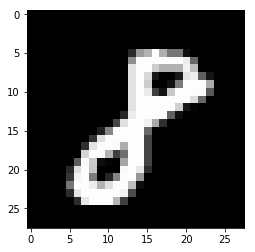

In [4]:
test_reshape=x_train[31].reshape(28, 28)
print('class lable')
print(y_train[31])

print('data')
plt.imshow(test_reshape, cmap='gray')
plt.show()

### Visualize Data

Label: []


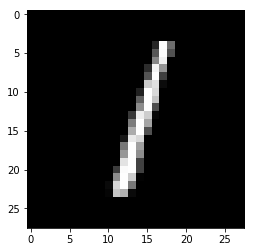

In [5]:
print("Label:",y_test[2:2])
plt.imshow(x_test[2:3].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [6]:
first_layer_size = 32
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(784,)))

model.add(Dense(32, activation='relu'))



model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


### Training and Testing

In [7]:
epochs = 5
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 224us/step - loss: 0.3272 - acc: 0.9073 - val_loss: 0.1930 - val_acc: 0.9430
Epoch 2/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.1568 - acc: 0.9534 - val_loss: 0.1362 - val_acc: 0.9602
Epoch 3/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.1166 - acc: 0.9649 - val_loss: 0.1167 - val_acc: 0.9649
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0940 - acc: 0.9713 - val_loss: 0.1043 - val_acc: 0.9691
Epoch 5/5
10000/10000 [==============================] - 1s 79us/step
Test loss: 0.10469266539085656
Test accuracy: 0.9692


### Visualize the weights

### Prediction

(1, 784)


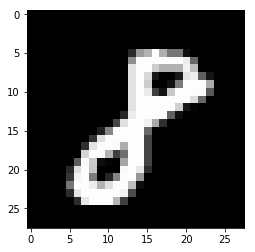

Prediction
 [2.84906037e-07 7.67604718e-07 2.17308138e-06 1.55446796e-05
 5.68110137e-09 1.11943834e-07 2.31306641e-09 7.31862201e-07
 9.99974728e-01 5.63254616e-06]
Thresholded output
 [0 0 0 0 0 0 0 0 1 0]


In [103]:
print(x_train[30:31].shape)
#test x_test[2:3] is equal x_test[2]
dhams_x=x_train[31:32]
#print(dhams_x)

plt.imshow(x_train[31:32].reshape(28,28), cmap='gray')
plt.show()
prediction = model.predict(dhams_x)
prediction = prediction[0]
print('Prediction\n',prediction)
print('Thresholded output\n',(prediction>0.5)*1)

In [36]:
#print(x_test[2]-x_test[2:3])

### Ground truth

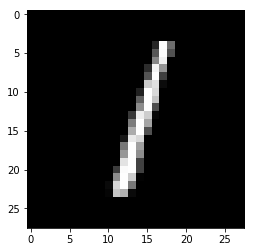

In [37]:
plt.imshow(dhams_x.reshape(28,28),cmap='gray')
plt.show()

### User Input

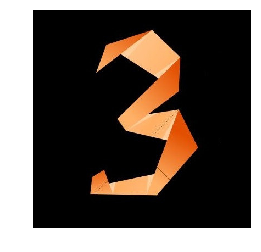

In [90]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

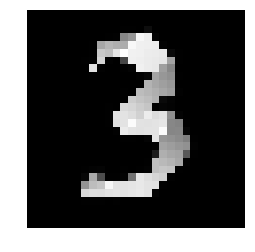

In [75]:
# Load image as grayscale
image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [77]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


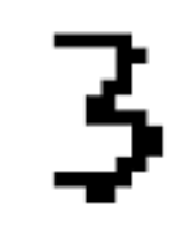

In [92]:
# Load image in color
image_bgr = cv2.imread('three.png', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

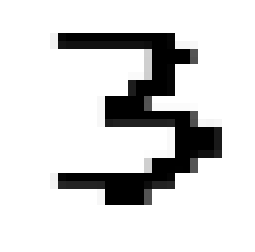

Prediction Score:
 [2.73031037e-05 1.05777265e-09 1.05622086e-04 4.61054093e-08
 2.51570496e-14 9.90990877e-01 8.87444615e-03 1.63131710e-06
 5.98788796e-10 1.28955888e-10]

Thresholded Score:
 [0 0 0 0 0 1 0 0 0 0]

Predicted Digit:
 5


In [93]:
# Load image as grayscale
image1 = cv2.imread('three.png', cv2.IMREAD_GRAYSCALE)
image_resized1 = cv2.resize(image1, (28, 28)) 
# Show image
plt.imshow(image_resized1, cmap='gray'), plt.axis("off")
plt.show()

prediction = model.predict(image_resized1.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [15]:
# serialize model to JSON
model_json = model.to_json()
print(model_json)
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 32, "activation": "tanh", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null

### Loading a model

In [16]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [17]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1415 - acc: 0.9588 - val_loss: 0.1478 - val_acc: 0.9563
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1305 - acc: 0.9620 - val_loss: 0.1443 - val_acc: 0.9577
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1219 - acc: 0.9643 - val_loss: 0.1394 - val_acc: 0.9594
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1147 - acc: 0.9666 - val_loss: 0.1339 - val_acc: 0.9609
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1086 - acc: 0.9686 - val_loss: 0.1314 - val_acc: 0.9608
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1032 - acc: 0.9698 - val_loss: 0.1274 - val_acc: 0.9628
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0983 - acc: 0.9717 - val_loss: 0.1277 - val_acc

### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid

In [18]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 2.0473 - acc: 0.4493 - val_loss: 1.7693 - val_acc: 0.6579
Epoch 2/10
60000/60000 [==============================] - 1s 25us/step - loss: 1.5056 - acc: 0.7422 - val_loss: 1.2427 - val_acc: 0.7817
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 1

### Relu

In [19]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.9764 - acc: 0.6983 - val_loss: 0.4811 - val_acc: 0.8674
Epoch 2/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.4098 - acc: 0.8843 - val_loss: 0.3485 - val_acc: 0.8977
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 0

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

### What are your findings?

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes i.e. 8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 1.8617 - acc: 0.5257 - val_loss: 1.3573 - val_acc: 0.7110
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 1.0207 - acc: 0.7497 - val_loss: 0.7574 - val_acc: 0.7976
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 0

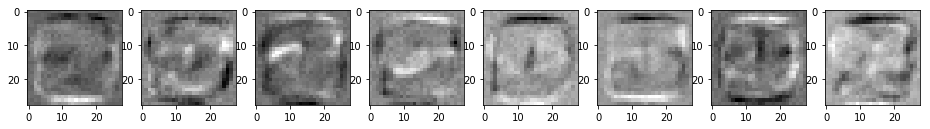

In [20]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes i.e. 128

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.8347 - acc: 0.8209 - val_loss: 0.3496 - val_acc: 0.9119
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2885 - acc: 0.9210 - val_loss: 0.2350 - val_acc: 0.9327
Epoch 3/10
60000/60000 [==============================] - 3s 56us/step - los

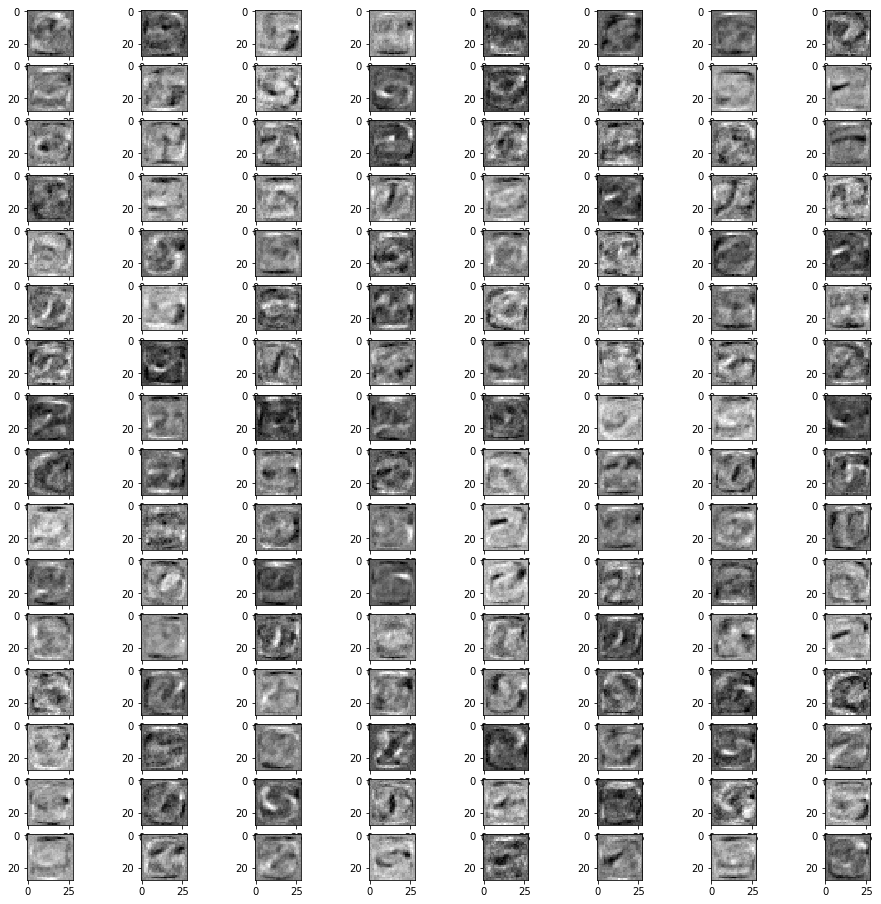

In [21]:
first_layer_size = 128

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Lower number of Layers i.e. 1

In [23]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                50        
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/step - loss: 1.4856 - acc: 0.5286 - val_loss: 0.9897 - val_acc: 0.7202
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.8215 - acc: 0.7528 - val_loss: 0.7108 - val_acc: 0.7959
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.6657 - acc: 0.8100 - val_loss: 0.6151 - val_acc: 0.8294
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - lo

### Higher number of Layers i.e. 4

In [24]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(784,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                50        
Total params: 3,230
Trainable params: 3,230
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 1.7874 - acc: 0.3555 - val_loss: 1.4555 - val_acc: 0.4905
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 1.3127

### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science